In [54]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive

In [55]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
# Load the dataset
file_path = '/content/drive/My Drive/Blossom Academy/BLOSSOM ACADEMY CAPSTONE PROJECT/CRYPTOCURRENCY_CLOSEPRICE _PREDICTION/Data.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')

In [31]:
data.head()

id  asset_id          open          high           low  \
0  ID_322qz6         1   9422.849081   9428.490628   9422.849081   
1  ID_3239o9         1   7985.359278   7992.059917   7967.567267   
2  ID_323J9k         1  49202.033778  49394.593518  49068.057046   
3  ID_323y5P         1           NaN           NaN           NaN   
4  ID_324kJH         1  10535.737119  10535.737119  10384.798216   

         volume    market_cap  url_shares  unique_url_shares  reddit_posts  \
0  7.131986e+08  1.737635e+11      1689.0              817.0          55.0   
1  4.004755e+08  1.426942e+11       920.0              544.0          20.0   
2  3.017729e+09  9.166977e+11      1446.0              975.0          72.0   
3           NaN           NaN         NaN                NaN          17.0   
4  1.150053e+09  1.921183e+11      1012.0              638.0          24.0   

   ...  percent_change_24h_rank  volume_24h_rank  social_volume_24h_rank  \
0  ...                    606.0              2.0                     1.0   
1  ...                      NaN              NaN                     NaN   
2  ...                    692.0              3.0                     1.0   
3  ...                      NaN              NaN                     NaN   
4  ...                    749.0              2.0                     1.0   

   social_score_24h_rank  medium  youtube  social_volume  percent_change_24h  \
0                    1.0     2.0      5.0           4422            1.434516   
1                    NaN     NaN      NaN           2159           -2.459507   
2                    1.0     NaN      NaN          10602            4.942448   
3                    NaN     NaN      NaN            285                 NaN   
4                    1.0     NaN      2.0           3996            2.609576   

   market_cap_global         close  
0       2.818066e+11   9428.279323  
1       2.126897e+11   7967.567267  
2       1.530712e+12  49120.738484  
3                NaN           NaN  
4       3.386925e+11  10384.798216  

[5 rows x 49 columns]

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12632 entries, 0 to 12631
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       12632 non-null  object 
 1   asset_id                 12632 non-null  int64  
 2   open                     8617 non-null   float64
 3   high                     8617 non-null   float64
 4   low                      8617 non-null   float64
 5   volume                   8605 non-null   float64
 6   market_cap               8379 non-null   float64
 7   url_shares               8575 non-null   float64
 8   unique_url_shares        8575 non-null   float64
 9   reddit_posts             12391 non-null  float64
 10  reddit_posts_score       12391 non-null  float64
 11  reddit_comments          12402 non-null  float64
 12  reddit_comments_score    12402 non-null  float64
 13  tweets                   8584 non-null   float64
 14  tweet_spam            

In [57]:
# Identify rows without a target variable (close)
missing_close = data[data['close'].isnull()]

In [34]:
print(missing_close)

              id  asset_id  open  high  low  volume  market_cap  url_shares  \
3      ID_323y5P         1   NaN   NaN  NaN     NaN         NaN         NaN   
5      ID_325hxw         1   NaN   NaN  NaN     NaN         NaN         NaN   
8      ID_3277jX         1   NaN   NaN  NaN     NaN         NaN         NaN   
11     ID_327dT9         1   NaN   NaN  NaN     NaN         NaN         NaN   
13     ID_329y38         1   NaN   NaN  NaN     NaN         NaN         NaN   
...          ...       ...   ...   ...  ...     ...         ...         ...   
12617  ID_zsxC73         1   NaN   NaN  NaN     NaN         NaN         NaN   
12621  ID_zuWkDu         1   NaN   NaN  NaN     NaN         NaN         NaN   
12624  ID_zvL3sH         1   NaN   NaN  NaN     NaN         NaN         NaN   
12625  ID_zvyUY6         1   NaN   NaN  NaN     NaN         NaN         NaN   
12627  ID_zybd4H         1   NaN   NaN  NaN     NaN         NaN         NaN   

       unique_url_shares  reddit_posts  ...  percen

In [58]:
# Dropping these rows
data.drop(missing_close.index, inplace=True)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8617 entries, 0 to 12631
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       8617 non-null   object 
 1   asset_id                 8617 non-null   int64  
 2   open                     8617 non-null   float64
 3   high                     8617 non-null   float64
 4   low                      8617 non-null   float64
 5   volume                   8605 non-null   float64
 6   market_cap               8379 non-null   float64
 7   url_shares               8575 non-null   float64
 8   unique_url_shares        8575 non-null   float64
 9   reddit_posts             8596 non-null   float64
 10  reddit_posts_score       8596 non-null   float64
 11  reddit_comments          8597 non-null   float64
 12  reddit_comments_score    8597 non-null   float64
 13  tweets                   8584 non-null   float64
 14  tweet_spam               858

In [37]:
# Checking for missing values
print(data.isnull().sum())

id                            0
asset_id                      0
open                          0
high                          0
low                           0
volume                       12
market_cap                  238
url_shares                   42
unique_url_shares            42
reddit_posts                 21
reddit_posts_score           21
reddit_comments              20
reddit_comments_score        20
tweets                       33
tweet_spam                   33
tweet_followers              43
tweet_quotes                 43
tweet_retweets               43
tweet_replies                43
tweet_favorites              43
tweet_sentiment1             33
tweet_sentiment2             33
tweet_sentiment3             33
tweet_sentiment4             33
tweet_sentiment5             33
tweet_sentiment_impact1      33
tweet_sentiment_impact2      33
tweet_sentiment_impact3      33
tweet_sentiment_impact4      33
tweet_sentiment_impact5      33
social_score                 33
average_

In [38]:
# Identify rows without a target variable (close)
missing_close = data[data['close'].isnull()]

# Remove these rows
data.drop(missing_close.index, inplace=True)

# Verify that missing rows are removed
print(data.isnull().sum())


id                            0
asset_id                      0
open                          0
high                          0
low                           0
volume                       12
market_cap                  238
url_shares                   42
unique_url_shares            42
reddit_posts                 21
reddit_posts_score           21
reddit_comments              20
reddit_comments_score        20
tweets                       33
tweet_spam                   33
tweet_followers              43
tweet_quotes                 43
tweet_retweets               43
tweet_replies                43
tweet_favorites              43
tweet_sentiment1             33
tweet_sentiment2             33
tweet_sentiment3             33
tweet_sentiment4             33
tweet_sentiment5             33
tweet_sentiment_impact1      33
tweet_sentiment_impact2      33
tweet_sentiment_impact3      33
tweet_sentiment_impact4      33
tweet_sentiment_impact5      33
social_score                 33
average_

In [39]:
# Dropping irrelevant columns
columns_to_drop = ["id", "asset_id", "medium", "youtube"]
data.drop(columns=columns_to_drop, inplace=True)

# Verifying that the columns have been dropped
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8617 entries, 0 to 12631
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   open                     8617 non-null   float64
 1   high                     8617 non-null   float64
 2   low                      8617 non-null   float64
 3   volume                   8605 non-null   float64
 4   market_cap               8379 non-null   float64
 5   url_shares               8575 non-null   float64
 6   unique_url_shares        8575 non-null   float64
 7   reddit_posts             8596 non-null   float64
 8   reddit_posts_score       8596 non-null   float64
 9   reddit_comments          8597 non-null   float64
 10  reddit_comments_score    8597 non-null   float64
 11  tweets                   8584 non-null   float64
 12  tweet_spam               8584 non-null   float64
 13  tweet_followers          8574 non-null   float64
 14  tweet_quotes             857

In [40]:
# Impute missing values in all columns with the corresponding 'close' value
for column in data.columns:
  if column != 'close':
    data[column] = data.apply(lambda row: row['close'] if pd.isna(row[column]) else row[column], axis=1)

# Check for remaining missing values
print(data.isnull().sum())

open                       0
high                       0
low                        0
volume                     0
market_cap                 0
url_shares                 0
unique_url_shares          0
reddit_posts               0
reddit_posts_score         0
reddit_comments            0
reddit_comments_score      0
tweets                     0
tweet_spam                 0
tweet_followers            0
tweet_quotes               0
tweet_retweets             0
tweet_replies              0
tweet_favorites            0
tweet_sentiment1           0
tweet_sentiment2           0
tweet_sentiment3           0
tweet_sentiment4           0
tweet_sentiment5           0
tweet_sentiment_impact1    0
tweet_sentiment_impact2    0
tweet_sentiment_impact3    0
tweet_sentiment_impact4    0
tweet_sentiment_impact5    0
social_score               0
average_sentiment          0
news                       0
price_score                0
social_impact_score        0
correlation_rank           0
galaxy_score  

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8617 entries, 0 to 12631
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   open                     8617 non-null   float64
 1   high                     8617 non-null   float64
 2   low                      8617 non-null   float64
 3   volume                   8617 non-null   float64
 4   market_cap               8617 non-null   float64
 5   url_shares               8617 non-null   float64
 6   unique_url_shares        8617 non-null   float64
 7   reddit_posts             8617 non-null   float64
 8   reddit_posts_score       8617 non-null   float64
 9   reddit_comments          8617 non-null   float64
 10  reddit_comments_score    8617 non-null   float64
 11  tweets                   8617 non-null   float64
 12  tweet_spam               8617 non-null   float64
 13  tweet_followers          8617 non-null   float64
 14  tweet_quotes             861

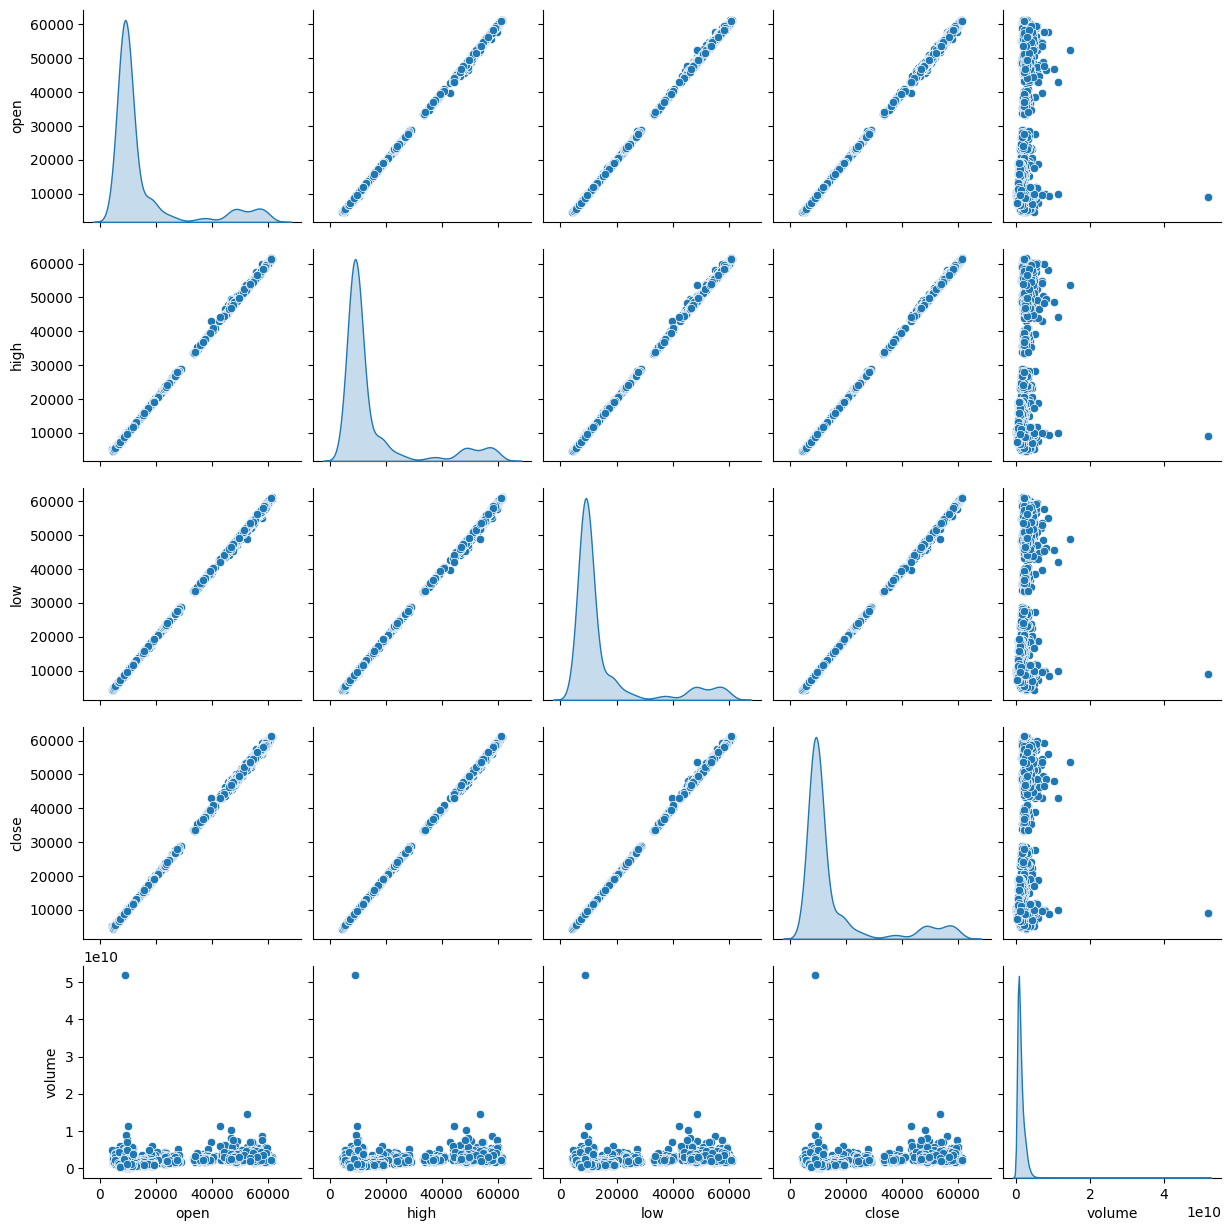

In [42]:
# Pairplot to visualize relationships between numerical features
sns.pairplot(data, vars=['open', 'high', 'low', 'close', 'volume'], diag_kind='kde')
plt.show()

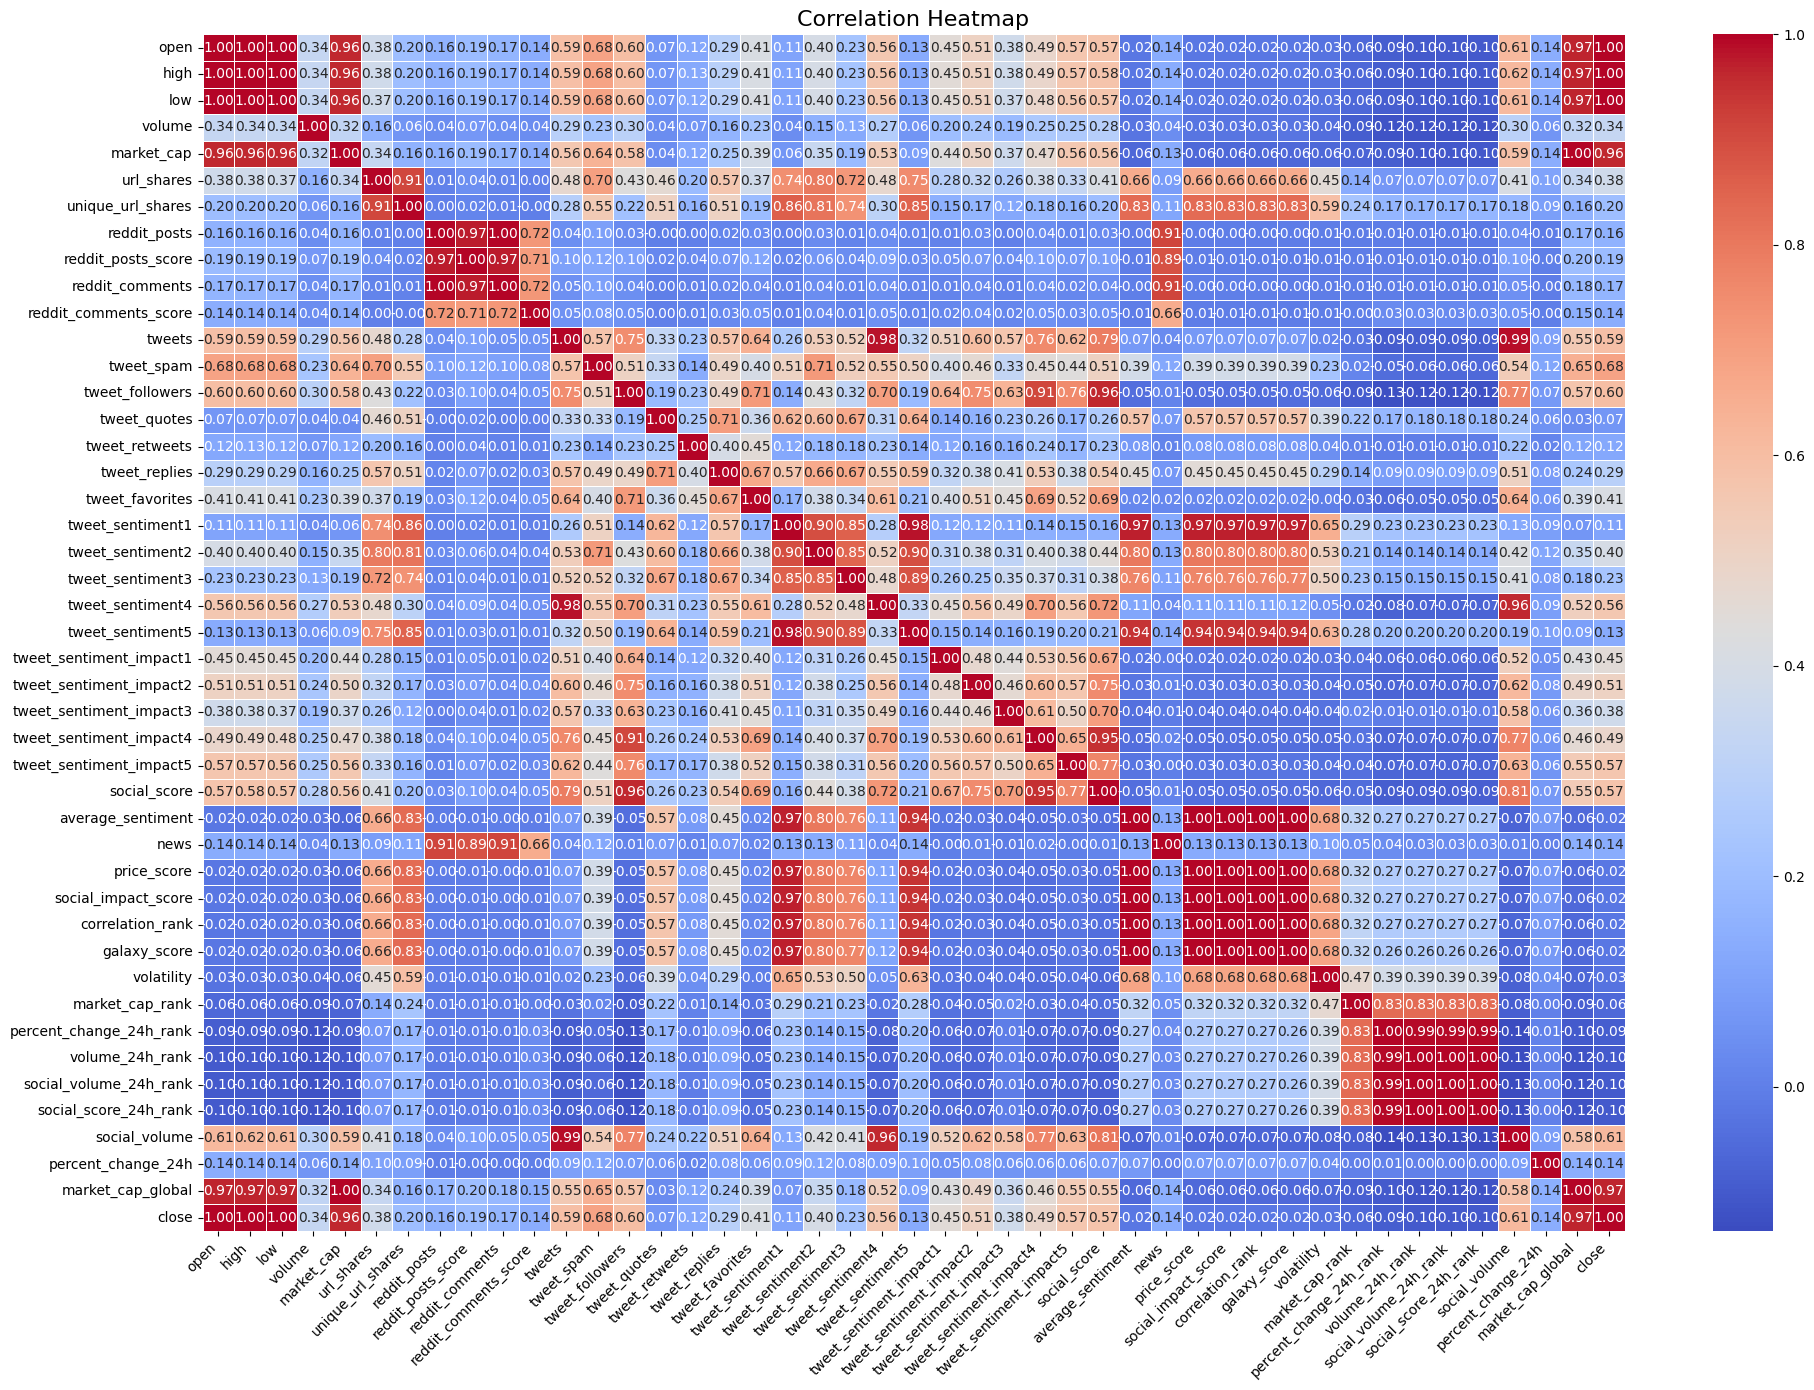

In [43]:
# Correlation heatmap
plt.figure(figsize=(20, 14))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


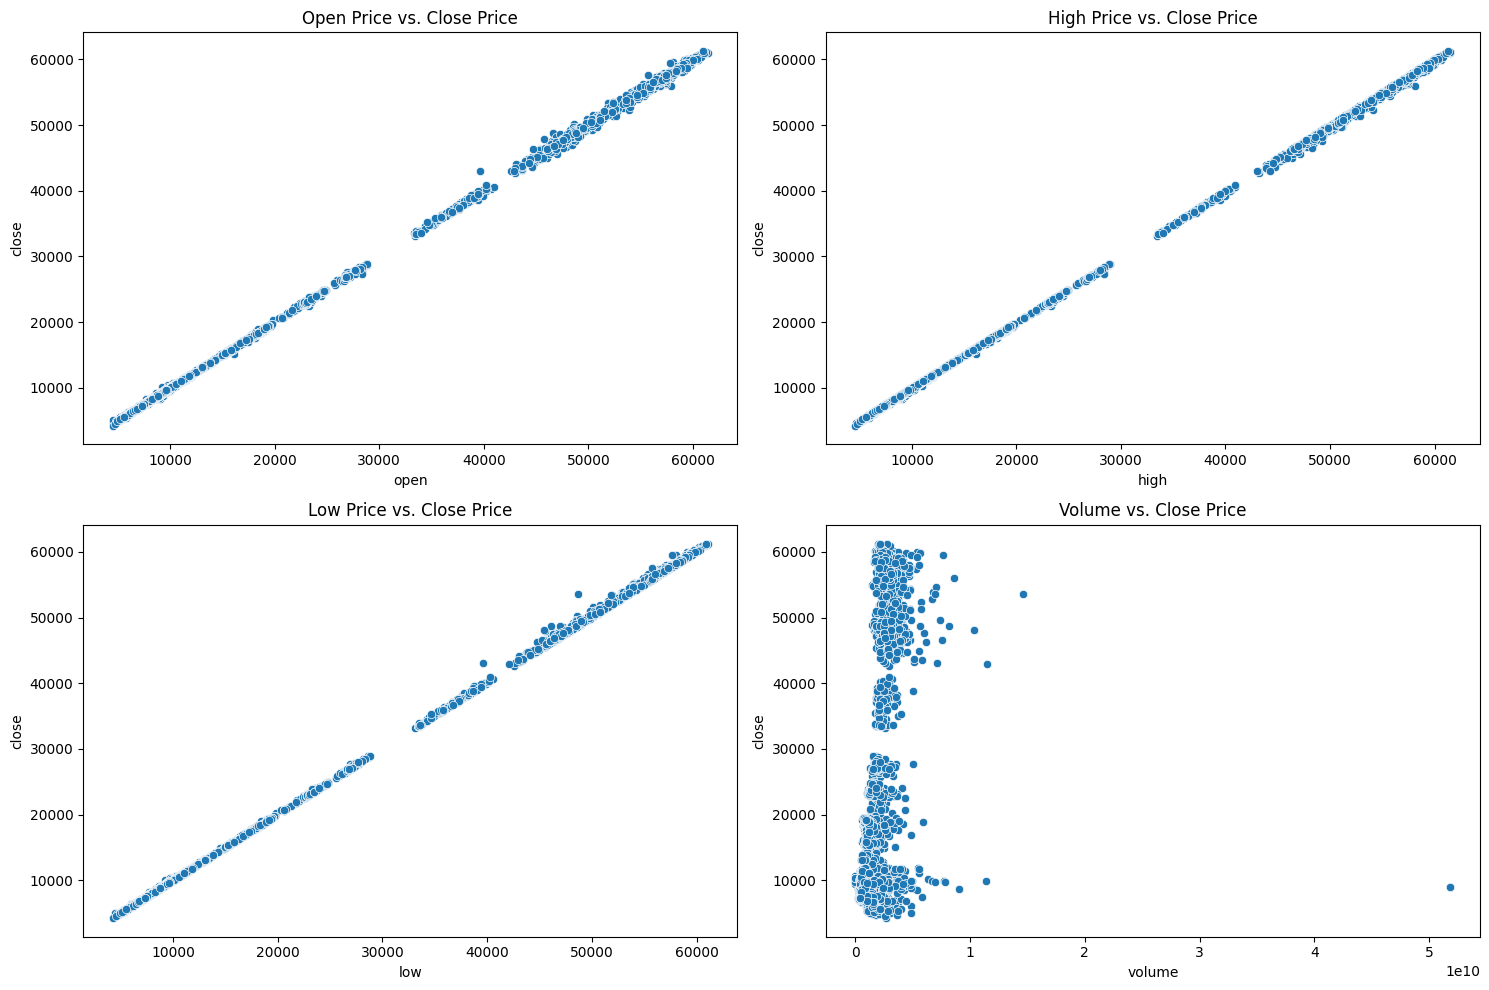

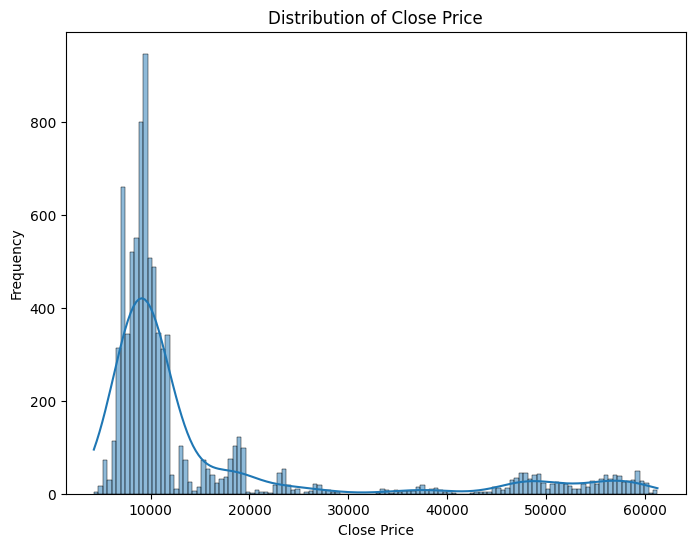

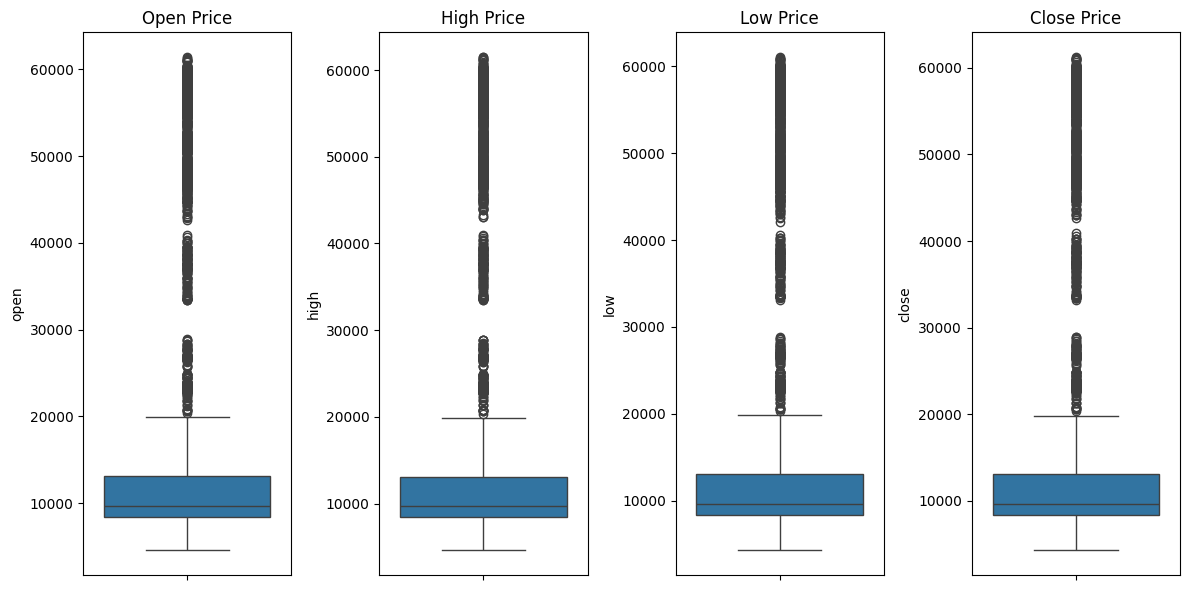

In [44]:
# Scatter plots for individual features vs. 'close'
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.scatterplot(x='open', y='close', data=data)
plt.title('Open Price vs. Close Price')

plt.subplot(2, 2, 2)
sns.scatterplot(x='high', y='close', data=data)
plt.title('High Price vs. Close Price')

plt.subplot(2, 2, 3)
sns.scatterplot(x='low', y='close', data=data)
plt.title('Low Price vs. Close Price')

plt.subplot(2, 2, 4)
sns.scatterplot(x='volume', y='close', data=data)
plt.title('Volume vs. Close Price')

plt.tight_layout()
plt.show()

# Distribution of the target variable 'close'
plt.figure(figsize=(8, 6))
sns.histplot(data['close'], kde=True)
plt.title('Distribution of Close Price')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

# Box plots to visualize potential outliers
plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
sns.boxplot(y=data['open'])
plt.title('Open Price')

plt.subplot(1, 4, 2)
sns.boxplot(y=data['high'])
plt.title('High Price')

plt.subplot(1, 4, 3)
sns.boxplot(y=data['low'])
plt.title('Low Price')

plt.subplot(1, 4, 4)
sns.boxplot(y=data['close'])
plt.title('Close Price')

plt.tight_layout()
plt.show()

In [45]:
# Calculate the IQR for each relevant column
Q1 = data[['open', 'high', 'low', 'close', 'volume']].quantile(0.25)
Q3 = data[['open', 'high', 'low', 'close', 'volume']].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
data_filtered = data[~((data[['open', 'high', 'low', 'close', 'volume']] < lower_bound) | (data[['open', 'high', 'low', 'close', 'volume']] > upper_bound)).any(axis=1)]

# Verify the number of removed outliers
print("Number of outliers removed:", len(data) - len(data_filtered))

Number of outliers removed: 1410


In [46]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7207 entries, 0 to 12630
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   open                     7207 non-null   float64
 1   high                     7207 non-null   float64
 2   low                      7207 non-null   float64
 3   volume                   7207 non-null   float64
 4   market_cap               7207 non-null   float64
 5   url_shares               7207 non-null   float64
 6   unique_url_shares        7207 non-null   float64
 7   reddit_posts             7207 non-null   float64
 8   reddit_posts_score       7207 non-null   float64
 9   reddit_comments          7207 non-null   float64
 10  reddit_comments_score    7207 non-null   float64
 11  tweets                   7207 non-null   float64
 12  tweet_spam               7207 non-null   float64
 13  tweet_followers          7207 non-null   float64
 14  tweet_quotes             720

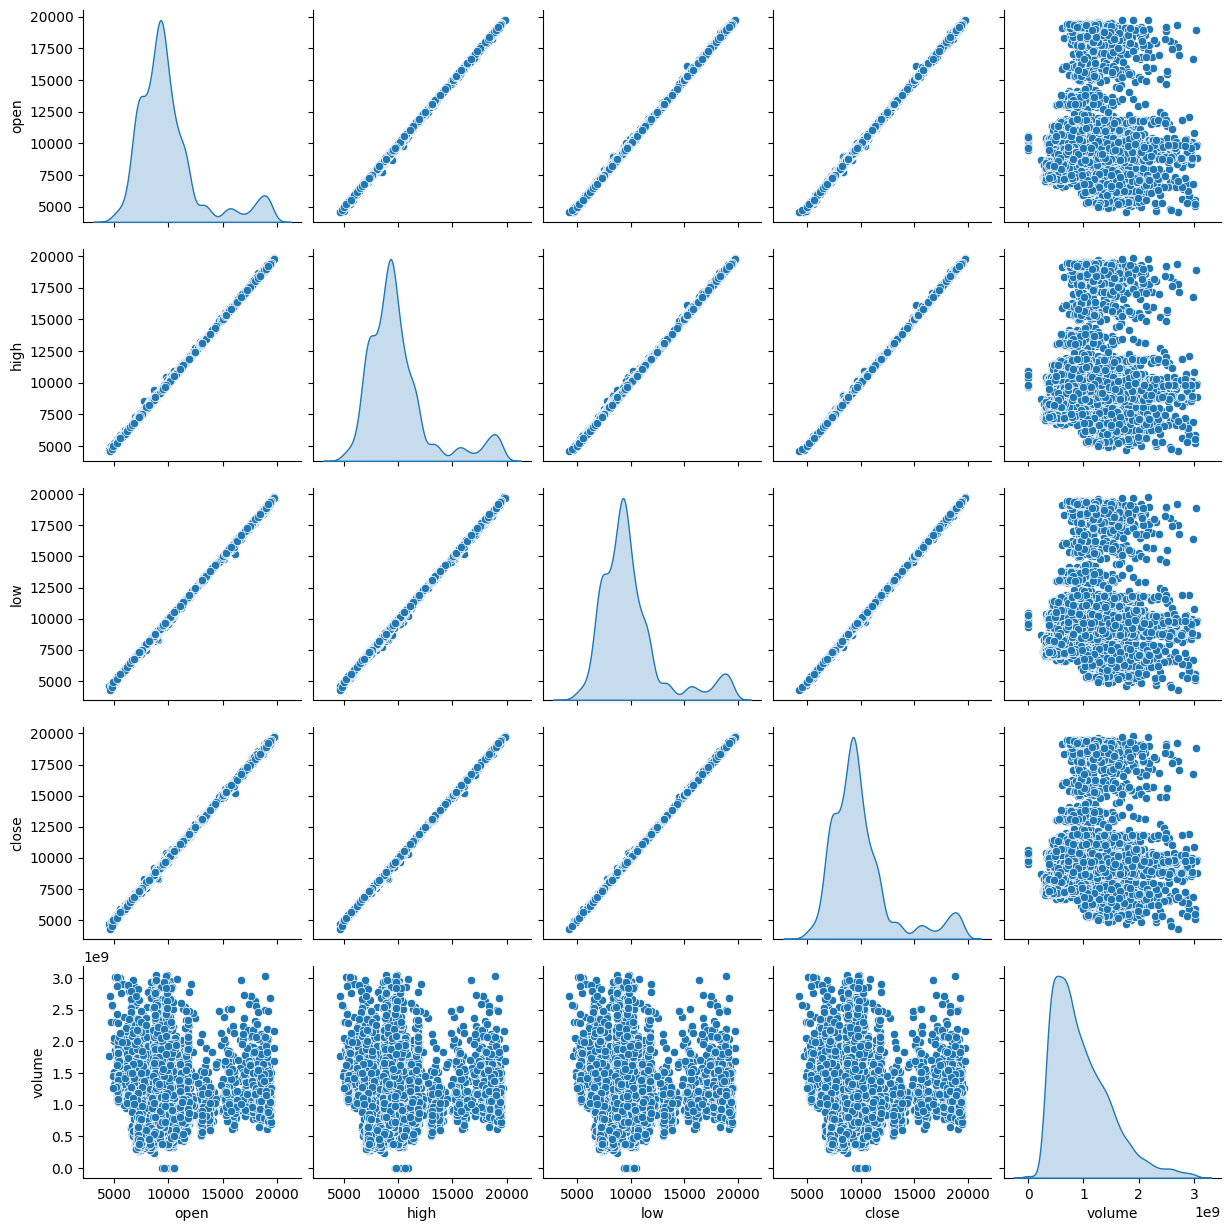

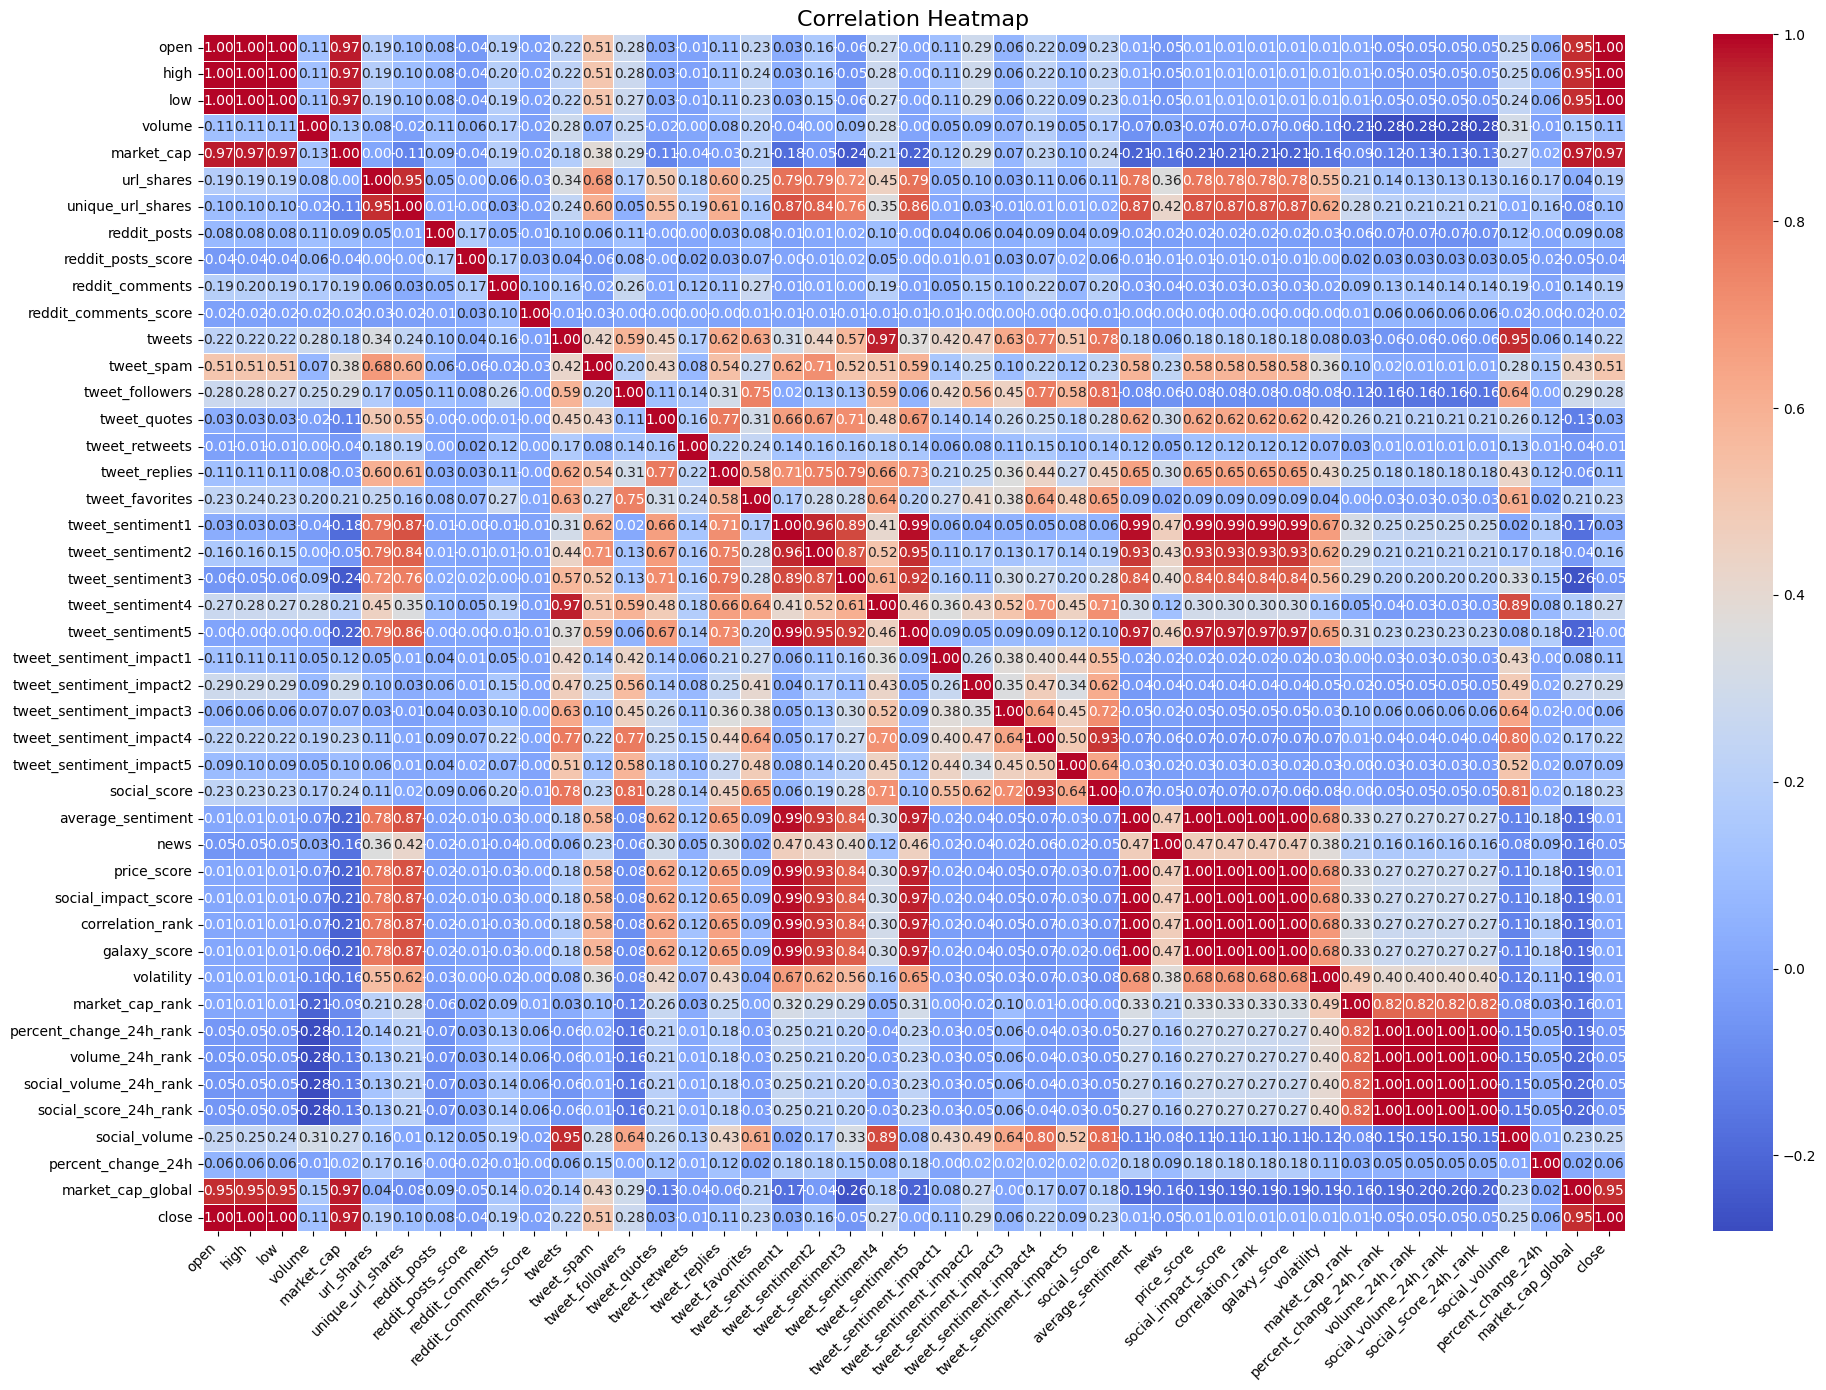

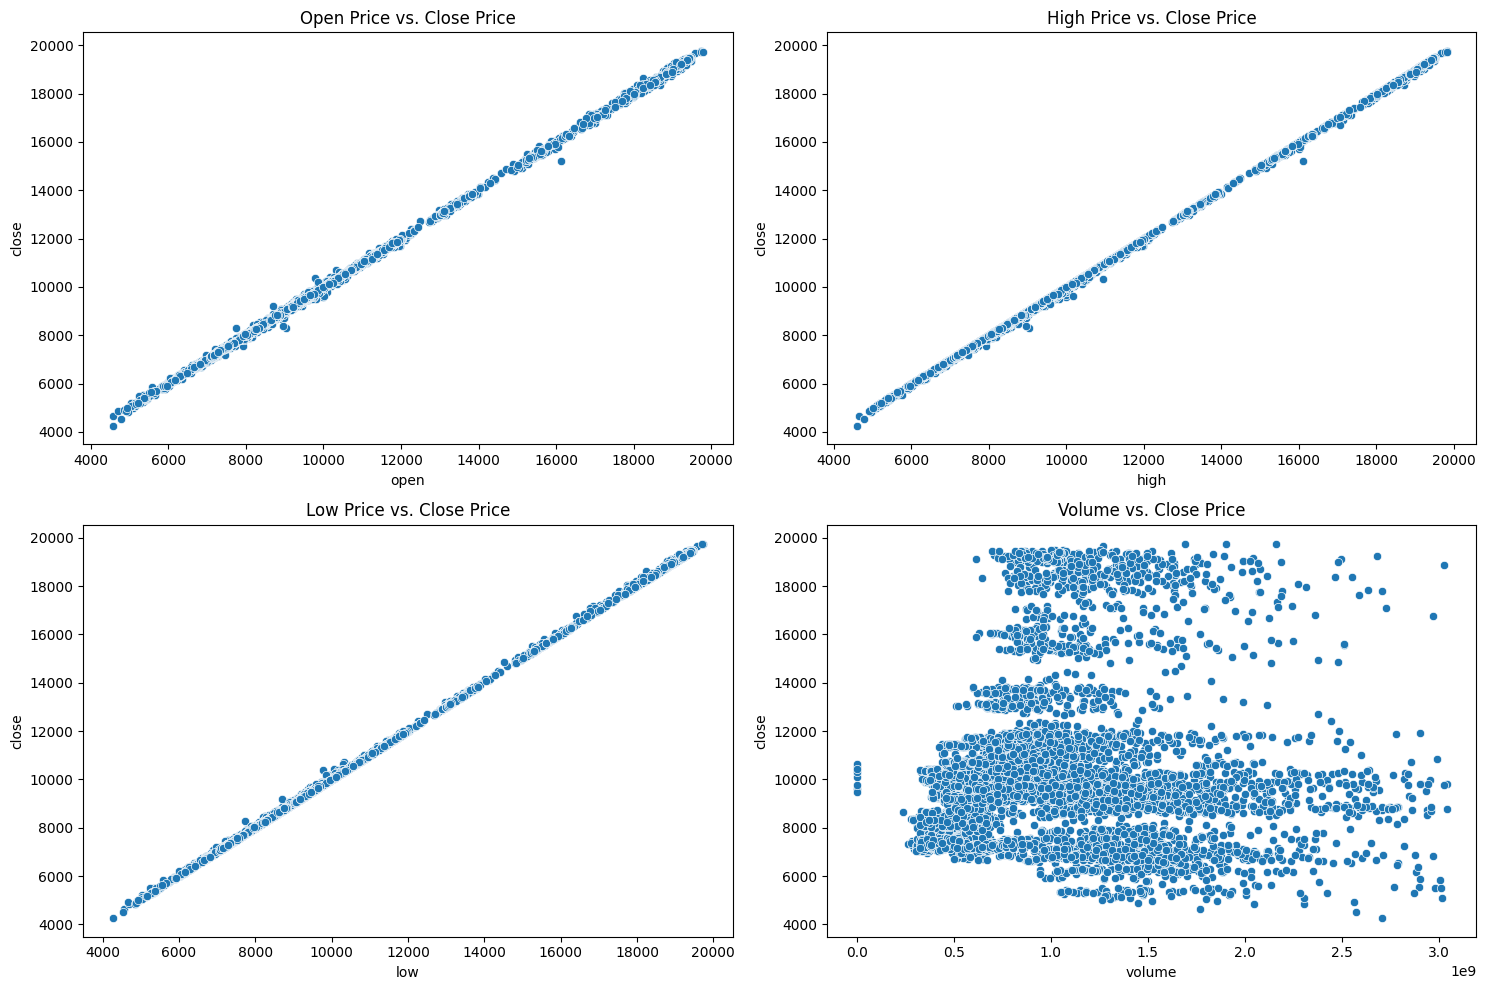

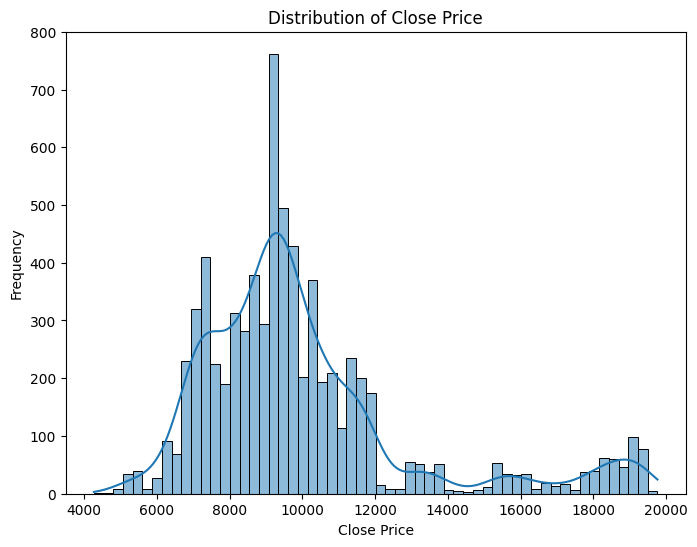

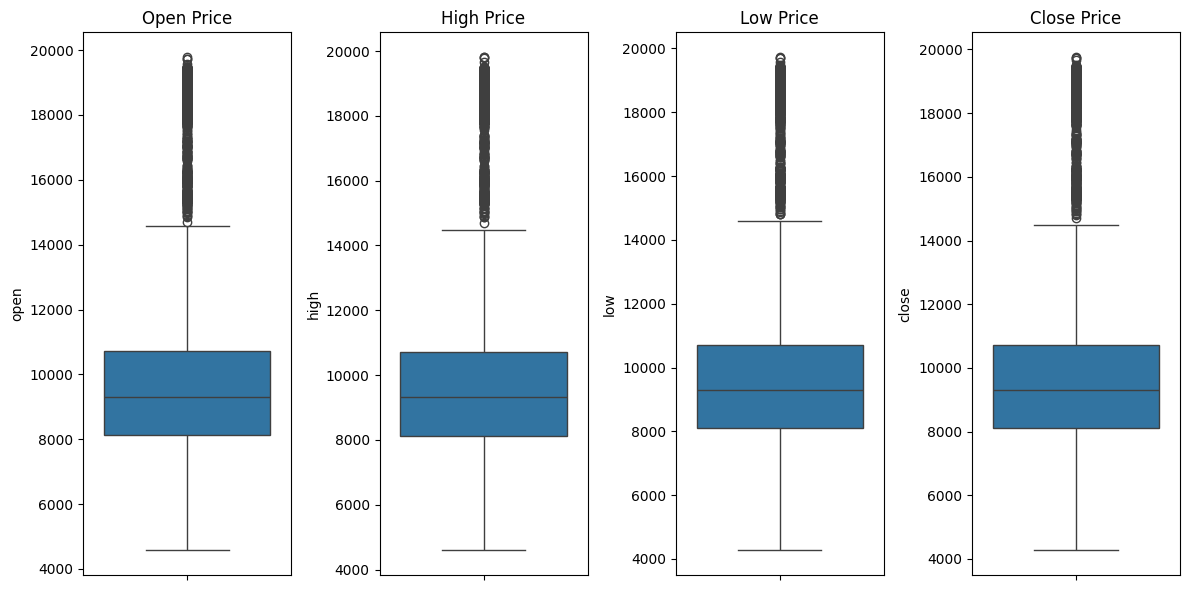

In [47]:
# Pairplot to visualize relationships between numerical features
sns.pairplot(data_filtered, vars=['open', 'high', 'low', 'close', 'volume'], diag_kind='kde')
plt.show()

# Correlation heatmap
plt.figure(figsize=(20, 14))
correlation_matrix = data_filtered.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Scatter plots for individual features vs. 'close'
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.scatterplot(x='open', y='close', data=data_filtered)
plt.title('Open Price vs. Close Price')

plt.subplot(2, 2, 2)
sns.scatterplot(x='high', y='close', data=data_filtered)
plt.title('High Price vs. Close Price')

plt.subplot(2, 2, 3)
sns.scatterplot(x='low', y='close', data=data_filtered)
plt.title('Low Price vs. Close Price')

plt.subplot(2, 2, 4)
sns.scatterplot(x='volume', y='close', data=data_filtered)
plt.title('Volume vs. Close Price')

plt.tight_layout()
plt.show()

# 2. Distribution of the target variable 'close'
plt.figure(figsize=(8, 6))
sns.histplot(data_filtered['close'], kde=True)
plt.title('Distribution of Close Price')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

# Box plots to visualize to see if there are still outliers
plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
sns.boxplot(y=data_filtered['open'])
plt.title('Open Price')

plt.subplot(1, 4, 2)
sns.boxplot(y=data_filtered['high'])
plt.title('High Price')

plt.subplot(1, 4, 3)
sns.boxplot(y=data_filtered['low'])
plt.title('Low Price')

plt.subplot(1, 4, 4)
sns.boxplot(y=data_filtered['close'])
plt.title('Close Price')

plt.tight_layout()
plt.show()


In [48]:
from scipy import stats

# Calculate z-scores for relevant columns
z_scores = np.abs(stats.zscore(data_filtered[['open', 'high', 'low', 'close', 'volume']]))

# Set a threshold for outlier detection (e.g., 3 standard deviations)
threshold = 3

# Filter the DataFrame to remove outliers based on z-scores
data_filtered_z = data_filtered[(z_scores < threshold).all(axis=1)]

# Verify the number of removed outliers
print("Number of outliers removed using z-score:", len(data_filtered) - len(data_filtered_z))

# Continue your analysis with the further filtered DataFrame 'data_filtered_z'


Number of outliers removed using z-score: 307


In [49]:
from sklearn.preprocessing import MinMaxScaler

# Normalize data
scaler = MinMaxScaler()
data_filtered_z[['open', 'high', 'low', 'volume']] = scaler.fit_transform(data_filtered_z[['open', 'high', 'low', 'volume']])

In [50]:
# Feature engineering
data_filtered_z['ma_50'] = data_filtered_z['close'].rolling(window=50).mean()
data_filtered_z['ma_200'] = data_filtered_z['close'].rolling(window=200).mean()

# Handling NaN values introduced by moving averages
data_filtered_z.dropna(inplace=True)


In [51]:
data_filtered_z.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6701 entries, 389 to 12630
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   open                     6701 non-null   float64
 1   high                     6701 non-null   float64
 2   low                      6701 non-null   float64
 3   volume                   6701 non-null   float64
 4   market_cap               6701 non-null   float64
 5   url_shares               6701 non-null   float64
 6   unique_url_shares        6701 non-null   float64
 7   reddit_posts             6701 non-null   float64
 8   reddit_posts_score       6701 non-null   float64
 9   reddit_comments          6701 non-null   float64
 10  reddit_comments_score    6701 non-null   float64
 11  tweets                   6701 non-null   float64
 12  tweet_spam               6701 non-null   float64
 13  tweet_followers          6701 non-null   float64
 14  tweet_quotes             6

In [52]:
data_filtered_z['sentiment'] = (
    data_filtered_z['tweet_sentiment1'] * data_filtered_z['tweet_sentiment_impact1'] +
    data_filtered_z['tweet_sentiment2'] * data_filtered_z['tweet_sentiment_impact2'] +
    data_filtered_z['tweet_sentiment3'] * data_filtered_z['tweet_sentiment_impact3'] +
    data_filtered_z['tweet_sentiment4'] * data_filtered_z['tweet_sentiment_impact4'] +
    data_filtered_z['tweet_sentiment5'] * data_filtered_z['tweet_sentiment_impact5']
 )

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Split data into training and testing sets
train_data_filtered_z, test_data_filtered_z = train_test_split(data_filtered_z, test_size=0.25, random_state=42)

# Develop and evaluate Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(train_data_filtered_z.drop('close', axis=1), train_data_filtered_z['close'])
rf_pred = rf_model.predict(test_data_filtered_z.drop('close', axis=1))

print('RF MAE:', mean_absolute_error(test_data_filtered_z['close'], rf_pred))

RF MAE: 13.906393759153932


In [59]:
# Hyperparameter Tuning for Random Forest

from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=2, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(train_data_filtered_z.drop('close', axis=1), train_data_filtered_z['close'])

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train a new Random Forest model with the best parameters
best_rf_model = RandomForestRegressor(**best_params)
best_rf_model.fit(train_data_filtered_z.drop('close', axis=1), train_data_filtered_z['close'])

# Make predictions on the test set
best_rf_pred = best_rf_model.predict(test_data_filtered_z.drop('close', axis=1))

# Evaluate the model
from sklearn.metrics import mean_absolute_error, r2_score

print('Improved RF MAE:', mean_absolute_error(test_data_filtered_z['close'], best_rf_pred))
print('Improved RF R^2 Score:', r2_score(test_data_filtered_z['close'], best_rf_pred))


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Improved RF MAE: 13.754790329394107
Improved RF R^2 Score: 0.9998819072324173


In [60]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test_data_filtered_z['close'], best_rf_pred)
print('Improved RF MSE:', mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print('Improved RF RMSE:', rmse)


Improved RF MSE: 767.4827669073343
Improved RF RMSE: 27.703479328548866


In [61]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(best_rf_model,
                           data_filtered_z.drop('close', axis=1),
                           data_filtered_z['close'],
                           cv=5,
                           scoring='neg_mean_absolute_error')

# Convert scores to positive and calculate mean
cv_mae_scores = -cv_scores
mean_cv_mae = np.mean(cv_mae_scores)

print("Cross-Validation MAE Scores:", cv_mae_scores)
print("Mean Cross-Validation MAE:", mean_cv_mae)


Cross-Validation MAE Scores: [13.40873699 13.86496009 12.86583895 13.43767762 12.68395668]
Mean Cross-Validation MAE: 13.252234065486471


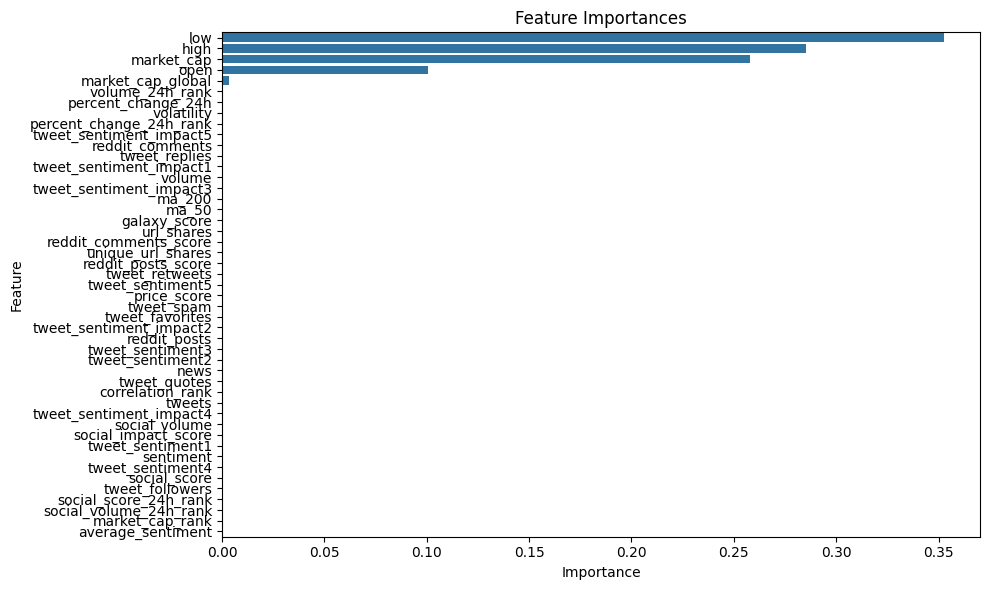

In [62]:
# Get feature importances
importances = best_rf_model.feature_importances_

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({
    'Feature': train_data_filtered_z.drop('close', axis=1).columns,
    'Importance': importances
})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


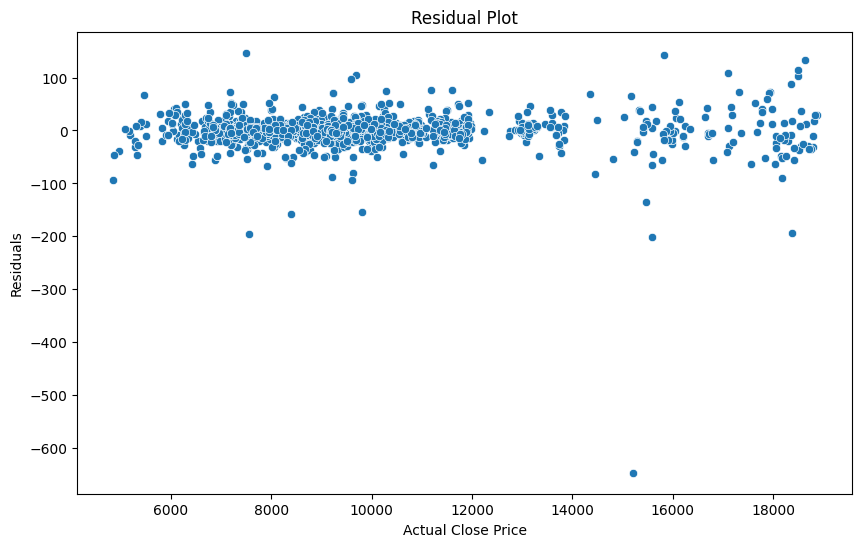

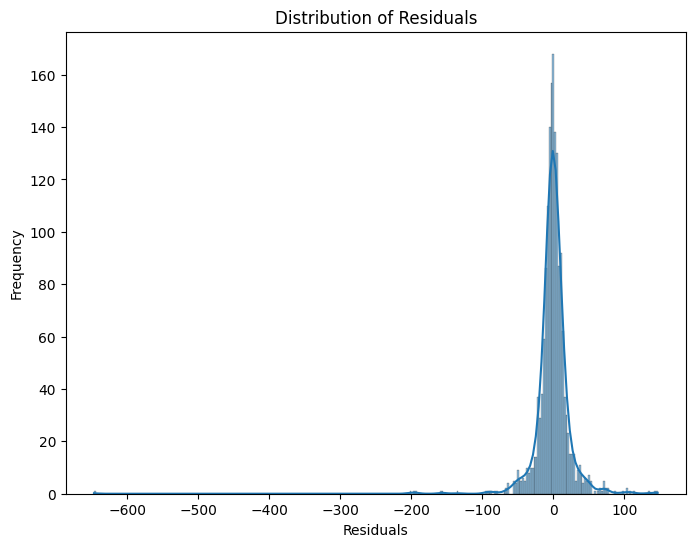

             Actual     Predicted       Error
2366   15210.792696  15857.628925  646.836229
11234  15586.449984  15788.497907  202.047923
7595    7554.909093   7750.292645  195.383552
4637   18366.300831  18559.612036  193.311205
6203    8387.149230   8544.752556  157.603326
6071    9806.952850   9961.848228  154.895378
2333    7489.685804   7342.724727  146.961077
3068   15815.404899  15672.299779  143.105120
1798   15471.107389  15605.579745  134.472356
9491   18629.333756  18495.303431  134.030325


In [63]:
# Calculate residuals
residuals = test_data_filtered_z['close'] - best_rf_pred

# Plot residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=test_data_filtered_z['close'], y=residuals)
plt.title('Residual Plot')
plt.xlabel('Actual Close Price')
plt.ylabel('Residuals')
plt.show()

# Check distribution of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Identify instances with largest errors
error_df = pd.DataFrame({
    'Actual': test_data_filtered_z['close'],
    'Predicted': best_rf_pred,
    'Error': abs(residuals)
})
largest_errors = error_df.nlargest(10, 'Error')
print(largest_errors)

# Analyze features for these instances
# ... (Further analysis based on the 'largest_errors' DataFrame)


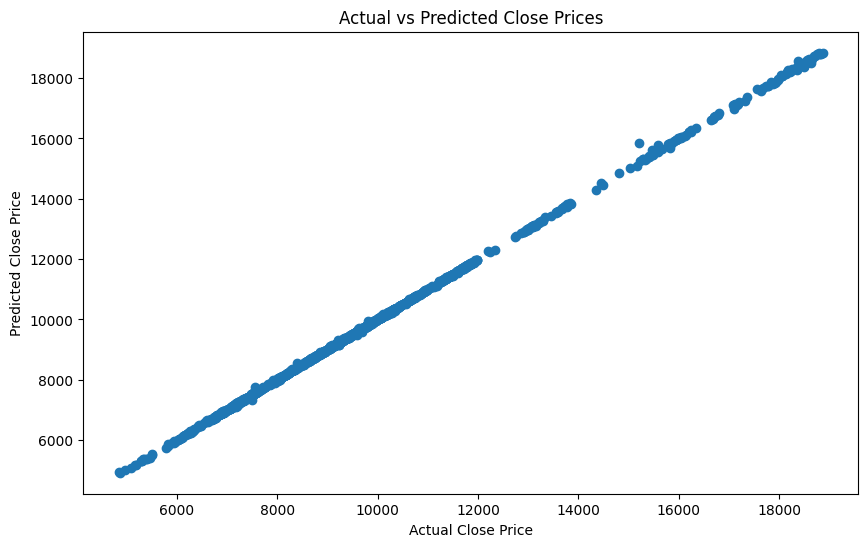

In [64]:
# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(test_data_filtered_z['close'], best_rf_pred)
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Actual vs Predicted Close Prices')
plt.show()


## ACCURACY SCORE AND OTHER ANALYSIS


In [67]:
# ACCURACY SCORE TEST
from sklearn.metrics import accuracy_score

threshold = 0.03
accurate_predictions = abs(test_data_filtered_z['close'] - best_rf_pred) <= threshold * test_data_filtered_z['close']
accuracy = accurate_predictions.mean()

print("Accuracy (within 3% threshold):", accuracy)


Accuracy (within 3% threshold): 0.9994033412887828
